Domain
$$
0  < X < 1
$$

Governing equation

$$
\frac{\partial^2 \phi}{\partial x^2} = S(x)
$$
where $$ S(x) = x(x-1) $$ 

Boundary conditions

$$
\phi(x = 0) = \phi(x = 1) = 0 
$$

Discritization (cintral in space)
$$
\frac{\partial^2 \phi}{\partial x^2} \Big|_i = S(x_i)
$$
where 
$$
\frac{\partial^2 \phi}{\partial x^2} \Big|_i = \frac{\phi(x)_{i-1} - 2\phi(x)_{i} + \phi(x)_{i+1}}{\Delta x ^2}
$$
and
$$
S(x_i) = x_i ( x_i - 1 )
$$
so
$$
\phi(x)_{i-1} -2\phi(x)_{i} + \phi(x)_{i+1}= \Delta x ^2 x_i(1 - x_i)
$$


Domain Dicomposition: $\newline$
A line with lengh of 1 and N nodes with $\Delta x$ spacing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10
L = 1
dx = L/(N-1)

Creating Ax = B

In [3]:
A = np.zeros((N,N))
B = np.zeros((N,1))

In [4]:
for i in range(N):
    xi = (i) * dx
#For A
    if i == 0:
        A[i,i] = 1
    elif i == N-1:
        A[i,i] = 1
    else:
        A[i , i] = -2
        A[i , i-1] = A[i , i+1] = 1
#For B
        B[i] = dx**2 * (xi) * (xi-1) 


Solvning Ax=B with numby alghorithems

In [5]:
x = np.linalg.solve(A, B)

Ploting result

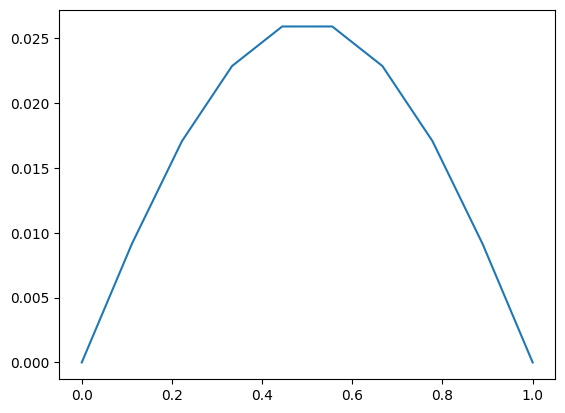

In [6]:
plt.plot(np.linspace(0 , 1 , N) ,x)

We have the analytical solution of governing equation and it is:

$$
\phi(x) = \frac{x^4}{12} - \frac{x^3}{6} + \frac{x}{12}
$$

Ploting exact solution

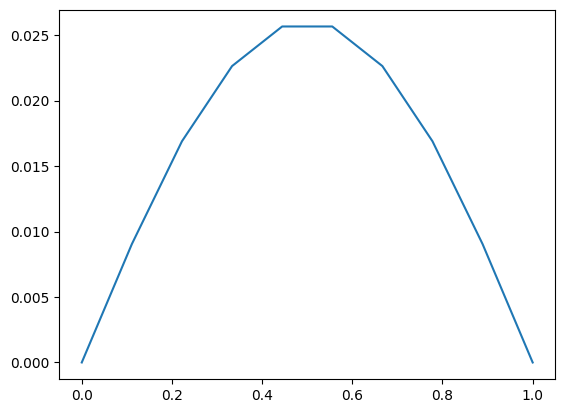

In [7]:
phi_exact = np.zeros(N)
for i in range(N):
    xi = i*dx
    phi_exact[i] = xi**4 / 12 - xi**3/6 + xi / 12
plt.plot(np.linspace(0 , 1 , N) ,phi_exact)

Ploting together

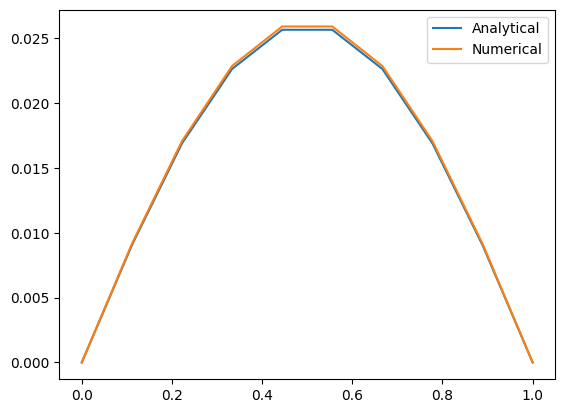

In [8]:
plt.plot(np.linspace(0 , 1 , N) ,phi_exact , label = 'Analytical')
plt.plot(np.linspace(0 , 1 , N) ,x , label = 'Numerical')
plt.legend()

Error analisys

In [9]:
def Numerical(N):
    N = 10
    L = 1
    dx = L/(N-1)
    A = np.zeros((N,N))
    B = np.zeros((N,1))
    for i in range(N):
        xi = (i) * dx
    #For A
        if i == 0:
            A[i,i] = 1
        elif i == N-1:
            A[i,i] = 1
        else:
            A[i , i] = -2
            A[i , i-1] = A[i , i+1] = 1
    #For B
            B[i] = dx**2 * (xi) * (xi-1) 
    x = np.linalg.solve(A, B)
    return x

In [11]:
def Analytical(N):
    phi_exact = np.zeros(N)
    for i in range(N):
        xi = i*dx
        phi_exact[i] = xi**4 / 12 - xi**3/6 + xi / 12
    return phi_exact

In [85]:
n = 10
N = 10
Norms = np.zeros(n)
number = np.zeros(n)
i = 1
while i <= n:
    Num = Numerical(i * N)
    Ana = Analytical(i * N)
    number[i-1] = L/(i*N-1)
    delta = np.abs(Num - Ana)
    norm = np.linalg.norm(delta)
    Norms[i-1] = norm
    i = i+1

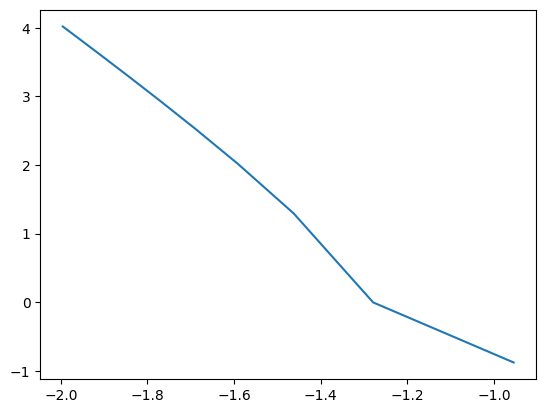

In [86]:
x = np.log10(number)
y = np.log10(Norms)
plt.plot(x , y)

In [87]:
m, b = np.polyfit(x , y, 1)

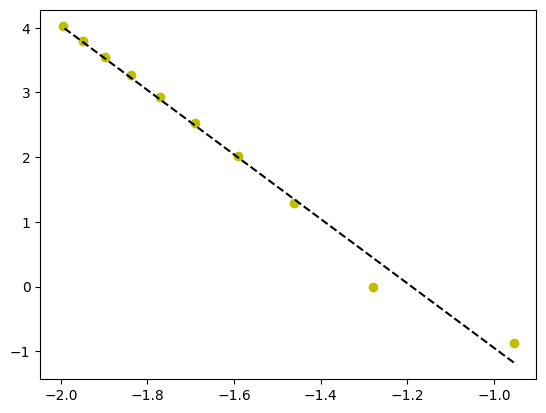

In [88]:
plt.plot(x, y, 'yo', x, m*x+b, '--k')

Slope of error

In [92]:
m

-2.4884398627842317